<a href="https://colab.research.google.com/github/SumaiyaZohaRODELA/Standard-Diffusion/blob/main/standardDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers==0.31.0 transformers accelerate safetensors
!pip install xformers  # optional but speeds up inference on GPU


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.2 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.35.2
    Uninstalling diffusers-0.35.2:
      Successfully uninstalled diffusers-0.35.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 MB 7.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
output_dir = "/content/drive/MyDrive/SD_outputs"
import os
os.makedirs(output_dir, exist_ok=True)
output_dir


'/content/drive/MyDrive/SD_outputs'

In [4]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None  # remove if you want NSFW filtering ON
).to("cuda")
pipe.enable_xformers_memory_efficient_attention()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/30 [00:00<?, ?it/s]

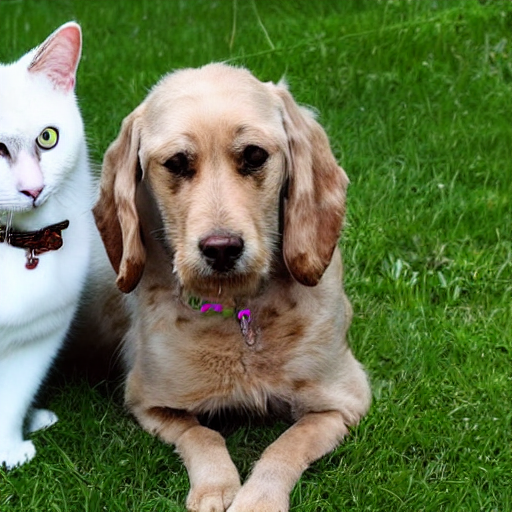

In [7]:
prompt = "a cat and a dog"
image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]

image


  0%|          | 0/30 [00:00<?, ?it/s]

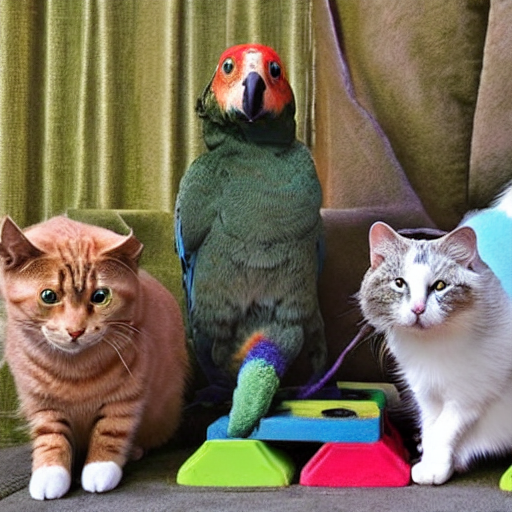

In [10]:
prompt = "two cat,two parrot and a dog"
image = pipe(prompt, num_inference_steps=30, guidance_scale=7).images[0]

image

In [11]:
image = pipe(
    prompt,
    num_inference_steps=50,   # was 30 — increase for more detail
    guidance_scale=8.5,       # stronger prompt adherence
).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float32,
    safety_checker=None
).to("cuda")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [13]:
model_id = "Lykon/dreamshaper-8"


In [14]:
model_id = "SG161222/Realistic_Vision_V5.1_noVAE"


In [15]:
pipe.enable_model_cpu_offload()


  0%|          | 0/50 [00:00<?, ?it/s]

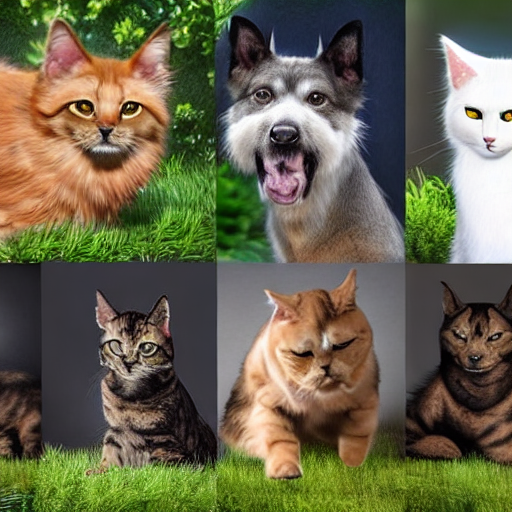

In [16]:

prompt = "a realistic group of dogs and cats, ultra detailed, 8k, sharp, clean background, photorealistic"
image = pipe(prompt, num_inference_steps=50, guidance_scale=8.5).images[0]

image

#NOTUN

In [17]:
!pip install diffusers==0.31.0 transformers accelerate safetensors datasets peft
!pip install xformers


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
dataset_path = "/content/drive/MyDrive/thesis/animals_preprocessed"


LOAD DATASET FOR TRAINING

In [20]:
from datasets import load_dataset

dataset = load_dataset(
    "imagefolder",
    data_dir=dataset_path,
    split="train",
)
len(dataset)


Resolving data files:   0%|          | 0/26180 [00:00<?, ?it/s]

Computing checksums:  76%|#######6  | 19922/26180 [00:05<00:01, 3984.38it/s]

Generating train split: 0 examples [00:00, ? examples/s]

26180

LoRA model

In [21]:
from diffusers import StableDiffusionPipeline
from diffusers import DDPMScheduler
from peft import LoraConfig
import torch

model_id = "runwayml/stable-diffusion-v1-5"

In [23]:
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["to_q", "to_k", "to_v", "to_out.0"],
    lora_dropout=0.05,
)


In [25]:
!pip install diffusers==0.25.0 peft==0.7.1 accelerate transformers safetensors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0
  Attempting uninstall: peft
    Found existing installation: peft 0.18.0
    Uninstalling peft-0.18.0:
      Successfully uninstalled peft-0.18.0


In [26]:
from diffusers import StableDiffusionPipeline, DDPMScheduler
from peft import LoraConfig
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["to_q", "to_k", "to_v", "to_out.0"],
    lora_dropout=0.05,
)

pipe.unet.add_adapter(lora_config)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [27]:
from torch.utils.data import DataLoader
from torchvision import transforms

In [29]:
preprocess = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])



In [30]:

def collate(batch):
    images = [preprocess(item["image"]) for item in batch]
    return torch.stack(images)

In [32]:
train_loader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=collate)

optimizer = torch.optim.Adam(pipe.unet.parameters(), lr=1e-4)


In [33]:
noise_scheduler = DDPMScheduler.from_pretrained(model_id, subfolder="scheduler")


convert image

In [39]:
with torch.no_grad():
    latents = pipe.vae.encode(batch).latent_dist.sample()
    latents = latents * pipe.vae.config.scaling_factor   # IMPORTANT


In [40]:
epochs = 5

pipe.unet.train()
model_dtype = next(pipe.unet.parameters()).dtype
device = "cuda"

for epoch in range(epochs):
    for batch in train_loader:
        # move images to GPU and convert dtype
        batch = batch.to(device=device, dtype=model_dtype)

        # ===================================
        # 1) Encode images into latent space
        # ===================================
        with torch.no_grad():
            latents = pipe.vae.encode(batch).latent_dist.sample()
            latents = latents * pipe.vae.config.scaling_factor  # VERY IMPORTANT
            # latents shape: [B, 4, H/8, W/8]

        # ===================================
        # 2) Text conditioning
        # ===================================
        prompts = ["a photo of 2 dogs playing"] * batch.shape[0]
        text_inputs = pipe.tokenizer(
            prompts,
            padding="max_length",
            max_length=pipe.tokenizer.model_max_length,
            return_tensors="pt",
        )
        input_ids = text_inputs.input_ids.to(device)

        with torch.no_grad():
            encoder_hidden_states = pipe.text_encoder(input_ids)[0]
        encoder_hidden_states = encoder_hidden_states.to(device=device, dtype=model_dtype)

        # ===================================
        # 3) Noise + timestep
        # ===================================
        noise = torch.randn_like(latents).to(device=device, dtype=model_dtype)
        timesteps = torch.randint(
            0,
            noise_scheduler.num_train_timesteps,
            (batch.shape[0],),
            device=device
        ).long()

        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # ===================================
        # 4) UNet forward
        # ===================================
        model_pred = pipe.unet(
            noisy_latents,
            timesteps,
            encoder_hidden_states=encoder_hidden_states,
            return_dict=False
        )[0]

        # ===================================
        # 5) Loss + backward
        # ===================================
        loss = torch.nn.functional.mse_loss(model_pred, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch+1} - Loss: {loss.item():.6f}")


Epoch 1 - Loss: 0.181396
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss: nan
Epoch 1 - Loss:

KeyboardInterrupt: 

In [41]:
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()
epochs = 5
device = "cuda"

pipe.unet.train()
lr = 1e-5  # IMPORTANT — reduce LR
optimizer = torch.optim.AdamW(pipe.unet.parameters(), lr=lr)

model_dtype = next(pipe.unet.parameters()).dtype

for epoch in range(epochs):
    for batch in train_loader:

        batch = batch.to(device=device, dtype=model_dtype)

        # ===============================
        # 1) Encode images into latents
        # ===============================
        with torch.no_grad():
            latents = pipe.vae.encode(batch).latent_dist.sample()
            latents = latents * pipe.vae.config.scaling_factor

        # ===============================
        # 2) Text conditioning
        # ===============================
        prompts = ["a photo of object"] * batch.shape[0]
        text_inputs = pipe.tokenizer(
            prompts,
            padding="max_length",
            truncation=True,
            max_length=pipe.tokenizer.model_max_length,
            return_tensors="pt"
        )
        input_ids = text_inputs.input_ids.to(device)

        with torch.no_grad():
            encoder_hidden_states = pipe.text_encoder(input_ids)[0]
        encoder_hidden_states = encoder_hidden_states.to(device, dtype=model_dtype)

        # ===============================
        # 3) Noise & timestep
        # ===============================
        noise = torch.randn_like(latents)
        timesteps = torch.randint(
            0,
            noise_scheduler.num_train_timesteps,
            (latents.shape[0],),
            device=device
        ).long()

        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # ===============================
        # 4) Forward pass (AMP)
        # ===============================
        with autocast(dtype=torch.float16):
            model_pred = pipe.unet(
                noisy_latents,
                timesteps,
                encoder_hidden_states=encoder_hidden_states,
            ).sample

            loss = torch.nn.functional.mse_loss(model_pred, noise)

        optimizer.zero_grad()
        scaler.scale(loss).backward()

        # gradient clipping to prevent NaN
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(pipe.unet.parameters(), 1.0)

        scaler.step(optimizer)
        scaler.update()

        print(f"Epoch {epoch+1} - Loss: {loss.item():.6f}")


/tmp/ipython-input-709544902.py:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/tmp/ipython-input-709544902.py:58: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=torch.float16):


ValueError: Attempting to unscale FP16 gradients.

In [38]:
# === corrected training loop ===
epochs = 5  # increase if needed

pipe.unet.train()
model_dtype = next(pipe.unet.parameters()).dtype  # expected dtype (e.g. torch.float16)
device = "cuda"

for epoch in range(epochs):
    for batch in train_loader:
        # move & cast images to correct device/dtype
        batch = batch.to(device)                       # put on CUDA
        batch = batch.to(dtype=model_dtype)            # cast to model dtype (e.g. float16)

        # -------------------------
        # 1) prepare text conditioning
        # -------------------------
        prompts = ["a photo of 2 dogs playing"] * batch.shape[0]   # change to class captions if you want
        text_inputs = pipe.tokenizer(
            prompts,
            padding="max_length",
            max_length=pipe.tokenizer.model_max_length,
            return_tensors="pt",
        )
        input_ids = text_inputs.input_ids.to(device)

        # text encoder returns float32 by default -> cast to model_dtype
        with torch.no_grad():
            encoder_hidden_states = pipe.text_encoder(input_ids)[0]
        encoder_hidden_states = encoder_hidden_states.to(device=device, dtype=model_dtype)

        # -------------------------
        # 2) noise + timesteps
        # -------------------------
        noise = torch.randn_like(batch).to(device=device, dtype=model_dtype)
        timesteps = torch.randint(
            0,
            noise_scheduler.num_train_timesteps,
            (batch.shape[0],),
            device=device
        ).long()

        noisy = noise_scheduler.add_noise(batch, noise, timesteps)

        # -------------------------
        # 3) forward UNet (with text cond)
        # -------------------------
        model_pred = pipe.unet(
            noisy,
            timesteps,
            encoder_hidden_states=encoder_hidden_states,
            return_dict=False
        )[0]

        # -------------------------
        # 4) loss + backward
        # -------------------------
        loss = torch.nn.functional.mse_loss(model_pred, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch+1} Loss: {loss.item():.6f}")


RuntimeError: Given groups=1, weight of size [320, 4, 3, 3], expected input[4, 3, 512, 512] to have 4 channels, but got 3 channels instead

In [ ]:
import argparse, os, sys, datetime, glob, importlib, csv
import numpy as np
import time
import torch
import torchvision
import pytorch_lightning as pl

from packaging import version
from omegaconf import OmegaConf
from torch.utils.data import random_split, DataLoader, Dataset, Subset
from functools import partial
from PIL import Image

from pytorch_lightning import seed_everything
from pytorch_lightning.trainer import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, Callback, LearningRateMonitor
from pytorch_lightning.utilities.distributed import rank_zero_only
from pytorch_lightning.utilities import rank_zero_info

from ldm.data.base import Txt2ImgIterableBaseDataset
from ldm.util import instantiate_from_config


def get_parser(**parser_kwargs):
    def str2bool(v):
        if isinstance(v, bool):
            return v
        if v.lower() in ("yes", "true", "t", "y", "1"):
            return True
        elif v.lower() in ("no", "false", "f", "n", "0"):
            return False
        else:
            raise argparse.ArgumentTypeError("Boolean value expected.")

    parser = argparse.ArgumentParser(**parser_kwargs)
    parser.add_argument(
        "-n",
        "--name",
        type=str,
        const=True,
        default="",
        nargs="?",
        help="postfix for logdir",
    )
    parser.add_argument(
        "-r",
        "--resume",
        type=str,
        const=True,
        default="",
        nargs="?",
        help="resume from logdir or checkpoint in logdir",
    )
    parser.add_argument(
        "-b",
        "--base",
        nargs="*",
        metavar="base_config.yaml",
        help="paths to base configs. Loaded from left-to-right. "
             "Parameters can be overwritten or added with command-line options of the form `--key value`.",
        default=list(),
    )
    parser.add_argument(
        "-t",
        "--train",
        type=str2bool,
        const=True,
        default=False,
        nargs="?",
        help="train",
    )
    parser.add_argument(
        "--no-test",
        type=str2bool,
        const=True,
        default=False,
        nargs="?",
        help="disable test",
    )
    parser.add_argument(
        "-p",
        "--project",
        help="name of new or path to existing project"
    )
    parser.add_argument(
        "-d",
        "--debug",
        type=str2bool,
        nargs="?",
        const=True,
        default=False,
        help="enable post-mortem debugging",
    )
    parser.add_argument(
        "-s",
        "--seed",
        type=int,
        default=23,
        help="seed for seed_everything",
    )
    parser.add_argument(
        "-f",
        "--postfix",
        type=str,
        default="",
        help="post-postfix for default name",
    )
    parser.add_argument(
        "-l",
        "--logdir",
        type=str,
        default="logs",
        help="directory for logging dat shit",
    )
    parser.add_argument(
        "--scale_lr",
        type=str2bool,
        nargs="?",
        const=True,
        default=True,
        help="scale base-lr by ngpu * batch_size * n_accumulate",
    )
    return parser


def nondefault_trainer_args(opt):
    parser = argparse.ArgumentParser()
    parser = Trainer.add_argparse_args(parser)
    args = parser.parse_args([])
    return sorted(k for k in vars(args) if getattr(opt, k) != getattr(args, k))


class WrappedDataset(Dataset):
    """Wraps an arbitrary object with __len__ and __getitem__ into a pytorch dataset"""

    def __init__(self, dataset):
        self.data = dataset

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


def worker_init_fn(_):
    worker_info = torch.utils.data.get_worker_info()

    dataset = worker_info.dataset
    worker_id = worker_info.id

    if isinstance(dataset, Txt2ImgIterableBaseDataset):
        split_size = dataset.num_records // worker_info.num_workers
        # reset num_records to the true number to retain reliable length information
        dataset.sample_ids = dataset.valid_ids[worker_id * split_size:(worker_id + 1) * split_size]
        current_id = np.random.choice(len(np.random.get_state()[1]), 1)
        return np.random.seed(np.random.get_state()[1][current_id] + worker_id)
    else:
        return np.random.seed(np.random.get_state()[1][0] + worker_id)


class DataModuleFromConfig(pl.LightningDataModule):
    def __init__(self, batch_size, train=None, validation=None, test=None, predict=None,
                 wrap=False, num_workers=None, shuffle_test_loader=False, use_worker_init_fn=False,
                 shuffle_val_dataloader=False):
        super().__init__()
        self.batch_size = batch_size
        self.dataset_configs = dict()
        self.num_workers = num_workers if num_workers is not None else batch_size * 2
        self.use_worker_init_fn = use_worker_init_fn
        if train is not None:
            self.dataset_configs["train"] = train
            self.train_dataloader = self._train_dataloader
        if validation is not None:
            self.dataset_configs["validation"] = validation
            self.val_dataloader = partial(self._val_dataloader, shuffle=shuffle_val_dataloader)
        if test is not None:
            self.dataset_configs["test"] = test
            self.test_dataloader = partial(self._test_dataloader, shuffle=shuffle_test_loader)
        if predict is not None:
            self.dataset_configs["predict"] = predict
            self.predict_dataloader = self._predict_dataloader
        self.wrap = wrap

    def prepare_data(self):
        for data_cfg in self.dataset_configs.values():
            instantiate_from_config(data_cfg)

    def setup(self, stage=None):
        self.datasets = dict(
            (k, instantiate_from_config(self.dataset_configs[k]))
            for k in self.dataset_configs)
        if self.wrap:
            for k in self.datasets:
                self.datasets[k] = WrappedDataset(self.datasets[k])

    def _train_dataloader(self):
        is_iterable_dataset = isinstance(self.datasets['train'], Txt2ImgIterableBaseDataset)
        if is_iterable_dataset or self.use_worker_init_fn:
            init_fn = worker_init_fn
        else:
            init_fn = None
        return DataLoader(self.datasets["train"], batch_size=self.batch_size,
                          num_workers=self.num_workers, shuffle=False if is_iterable_dataset else True,
                          worker_init_fn=init_fn)

    def _val_dataloader(self, shuffle=False):
        if isinstance(self.datasets['validation'], Txt2ImgIterableBaseDataset) or self.use_worker_init_fn:
            init_fn = worker_init_fn
        else:
            init_fn = None
        return DataLoader(self.datasets["validation"],
                          batch_size=self.batch_size,
                          num_workers=self.num_workers,
                          worker_init_fn=init_fn,
                          shuffle=shuffle)

    def _test_dataloader(self, shuffle=False):
        is_iterable_dataset = isinstance(self.datasets['train'], Txt2ImgIterableBaseDataset)
        if is_iterable_dataset or self.use_worker_init_fn:
            init_fn = worker_init_fn
        else:
            init_fn = None

        # do not shuffle dataloader for iterable dataset
        shuffle = shuffle and (not is_iterable_dataset)

        return DataLoader(self.datasets["test"], batch_size=self.batch_size,
                          num_workers=self.num_workers, worker_init_fn=init_fn, shuffle=shuffle)

    def _predict_dataloader(self, shuffle=False):
        if isinstance(self.datasets['predict'], Txt2ImgIterableBaseDataset) or self.use_worker_init_fn:
            init_fn = worker_init_fn
        else:
            init_fn = None
        return DataLoader(self.datasets["predict"], batch_size=self.batch_size,
                          num_workers=self.num_workers, worker_init_fn=init_fn)


class SetupCallback(Callback):
    def __init__(self, resume, now, logdir, ckptdir, cfgdir, config, lightning_config):
        super().__init__()
        self.resume = resume
        self.now = now
        self.logdir = logdir
        self.ckptdir = ckptdir
        self.cfgdir = cfgdir
        self.config = config
        self.lightning_config = lightning_config

    def on_keyboard_interrupt(self, trainer, pl_module):
        if trainer.global_rank == 0:
            print("Summoning checkpoint.")
            ckpt_path = os.path.join(self.ckptdir, "last.ckpt")
            trainer.save_checkpoint(ckpt_path)

    def on_pretrain_routine_start(self, trainer, pl_module):
        if trainer.global_rank == 0:
            # Create logdirs and save configs
            os.makedirs(self.logdir, exist_ok=True)
            os.makedirs(self.ckptdir, exist_ok=True)
            os.makedirs(self.cfgdir, exist_ok=True)

            if "callbacks" in self.lightning_config:
                if 'metrics_over_trainsteps_checkpoint' in self.lightning_config['callbacks']:
                    os.makedirs(os.path.join(self.ckptdir, 'trainstep_checkpoints'), exist_ok=True)
            print("Project config")
            print(OmegaConf.to_yaml(self.config))
            OmegaConf.save(self.config,
                           os.path.join(self.cfgdir, "{}-project.yaml".format(self.now)))

            print("Lightning config")
            print(OmegaConf.to_yaml(self.lightning_config))
            OmegaConf.save(OmegaConf.create({"lightning": self.lightning_config}),
                           os.path.join(self.cfgdir, "{}-lightning.yaml".format(self.now)))

        else:
            # ModelCheckpoint callback created log directory --- remove it
            if not self.resume and os.path.exists(self.logdir):
                dst, name = os.path.split(self.logdir)
                dst = os.path.join(dst, "child_runs", name)
                os.makedirs(os.path.split(dst)[0], exist_ok=True)
                try:
                    os.rename(self.logdir, dst)
                except FileNotFoundError:
                    pass


class ImageLogger(Callback):
    def __init__(self, batch_frequency, max_images, clamp=True, increase_log_steps=True,
                 rescale=True, disabled=False, log_on_batch_idx=False, log_first_step=False,
                 log_images_kwargs=None):
        super().__init__()
        self.rescale = rescale
        self.batch_freq = batch_frequency
        self.max_images = max_images
        self.logger_log_images = {
            pl.loggers.TestTubeLogger: self._testtube,
        }
        self.log_steps = [2 ** n for n in range(int(np.log2(self.batch_freq)) + 1)]
        if not increase_log_steps:
            self.log_steps = [self.batch_freq]
        self.clamp = clamp
        self.disabled = disabled
        self.log_on_batch_idx = log_on_batch_idx
        self.log_images_kwargs = log_images_kwargs if log_images_kwargs else {}
        self.log_first_step = log_first_step

    @rank_zero_only
    def _testtube(self, pl_module, images, batch_idx, split):
        for k in images:
            grid = torchvision.utils.make_grid(images[k])
            grid = (grid + 1.0) / 2.0  # -1,1 -> 0,1; c,h,w

            tag = f"{split}/{k}"
            pl_module.logger.experiment.add_image(
                tag, grid,
                global_step=pl_module.global_step)

    @rank_zero_only
    def log_local(self, save_dir, split, images,
                  global_step, current_epoch, batch_idx):
        root = os.path.join(save_dir, "images", split)
        for k in images:
            grid = torchvision.utils.make_grid(images[k], nrow=4)
            if self.rescale:
                grid = (grid + 1.0) / 2.0  # -1,1 -> 0,1; c,h,w
            grid = grid.transpose(0, 1).transpose(1, 2).squeeze(-1)
            grid = grid.numpy()
            grid = (grid * 255).astype(np.uint8)
            filename = "{}_gs-{:06}_e-{:06}_b-{:06}.png".format(
                k,
                global_step,
                current_epoch,
                batch_idx)
            path = os.path.join(root, filename)
            os.makedirs(os.path.split(path)[0], exist_ok=True)
            Image.fromarray(grid).save(path)

    def log_img(self, pl_module, batch, batch_idx, split="train"):
        check_idx = batch_idx if self.log_on_batch_idx else pl_module.global_step
        if (self.check_frequency(check_idx) and  # batch_idx % self.batch_freq == 0
                hasattr(pl_module, "log_images") and
                callable(pl_module.log_images) and
                self.max_images > 0):
            logger = type(pl_module.logger)

            is_train = pl_module.training
            if is_train:
                pl_module.eval()

            with torch.no_grad():
                images = pl_module.log_images(batch, split=split, **self.log_images_kwargs)

            for k in images:
                N = min(images[k].shape[0], self.max_images)
                images[k] = images[k][:N]
                if isinstance(images[k], torch.Tensor):
                    images[k] = images[k].detach().cpu()
                    if self.clamp:
                        images[k] = torch.clamp(images[k], -1., 1.)

            self.log_local(pl_module.logger.save_dir, split, images,
                           pl_module.global_step, pl_module.current_epoch, batch_idx)

            logger_log_images = self.logger_log_images.get(logger, lambda *args, **kwargs: None)
            logger_log_images(pl_module, images, pl_module.global_step, split)

            if is_train:
                pl_module.train()

    def check_frequency(self, check_idx):
        if ((check_idx % self.batch_freq) == 0 or (check_idx in self.log_steps)) and (
                check_idx > 0 or self.log_first_step):
            try:
                self.log_steps.pop(0)
            except IndexError as e:
                print(e)
                pass
            return True
        return False

    def on_train_batch_end(self, trainer, pl_module, outputs, batch, batch_idx, dataloader_idx):
        if not self.disabled and (pl_module.global_step > 0 or self.log_first_step):
            self.log_img(pl_module, batch, batch_idx, split="train")

    def on_validation_batch_end(self, trainer, pl_module, outputs, batch, batch_idx, dataloader_idx):
        if not self.disabled and pl_module.global_step > 0:
            self.log_img(pl_module, batch, batch_idx, split="val")
        if hasattr(pl_module, 'calibrate_grad_norm'):
            if (pl_module.calibrate_grad_norm and batch_idx % 25 == 0) and batch_idx > 0:
                self.log_gradients(trainer, pl_module, batch_idx=batch_idx)


class CUDACallback(Callback):
    # see https://github.com/SeanNaren/minGPT/blob/master/mingpt/callback.py
    def on_train_epoch_start(self, trainer, pl_module):
        # Reset the memory use counter
        torch.cuda.reset_peak_memory_stats(trainer.root_gpu)
        torch.cuda.synchronize(trainer.root_gpu)
        self.start_time = time.time()

    def on_train_epoch_end(self, trainer, pl_module, outputs):
        torch.cuda.synchronize(trainer.root_gpu)
        max_memory = torch.cuda.max_memory_allocated(trainer.root_gpu) / 2 ** 20
        epoch_time = time.time() - self.start_time

        try:
            max_memory = trainer.training_type_plugin.reduce(max_memory)
            epoch_time = trainer.training_type_plugin.reduce(epoch_time)

            rank_zero_info(f"Average Epoch time: {epoch_time:.2f} seconds")
            rank_zero_info(f"Average Peak memory {max_memory:.2f}MiB")
        except AttributeError:
            pass


if __name__ == "__main__":
    # custom parser to specify config files, train, test and debug mode,
    # postfix, resume.
    # `--key value` arguments are interpreted as arguments to the trainer.
    # `nested.key=value` arguments are interpreted as config parameters.
    # configs are merged from left-to-right followed by command line parameters.

    # model:
    #   base_learning_rate: float
    #   target: path to lightning module
    #   params:
    #       key: value
    # data:
    #   target: main.DataModuleFromConfig
    #   params:
    #      batch_size: int
    #      wrap: bool
    #      train:
    #          target: path to train dataset
    #          params:
    #              key: value
    #      validation:
    #          target: path to validation dataset
    #          params:
    #              key: value
    #      test:
    #          target: path to test dataset
    #          params:
    #              key: value
    # lightning: (optional, has sane defaults and can be specified on cmdline)
    #   trainer:
    #       additional arguments to trainer
    #   logger:
    #       logger to instantiate
    #   modelcheckpoint:
    #       modelcheckpoint to instantiate
    #   callbacks:
    #       callback1:
    #           target: importpath
    #           params:
    #               key: value

    now = datetime.datetime.now().strftime("%Y-%m-%dT%H-%M-%S")

    # add cwd for convenience and to make classes in this file available when
    # running as `python main.py`
    # (in particular `main.DataModuleFromConfig`)
    sys.path.append(os.getcwd())

    parser = get_parser()
    parser = Trainer.add_argparse_args(parser)

    opt, unknown = parser.parse_known_args()
    if opt.name and opt.resume:
        raise ValueError(
            "-n/--name and -r/--resume cannot be specified both."
            "If you want to resume training in a new log folder, "
            "use -n/--name in combination with --resume_from_checkpoint"
        )
    if opt.resume:
        if not os.path.exists(opt.resume):
            raise ValueError("Cannot find {}".format(opt.resume))
        if os.path.isfile(opt.resume):
            paths = opt.resume.split("/")
            # idx = len(paths)-paths[::-1].index("logs")+1
            # logdir = "/".join(paths[:idx])
            logdir = "/".join(paths[:-2])
            ckpt = opt.resume
        else:
            assert os.path.isdir(opt.resume), opt.resume
            logdir = opt.resume.rstrip("/")
            ckpt = os.path.join(logdir, "checkpoints", "last.ckpt")

        opt.resume_from_checkpoint = ckpt
        base_configs = sorted(glob.glob(os.path.join(logdir, "configs/*.yaml")))
        opt.base = base_configs + opt.base
        _tmp = logdir.split("/")
        nowname = _tmp[-1]
    else:
        if opt.name:
            name = "_" + opt.name
        elif opt.base:
            cfg_fname = os.path.split(opt.base[0])[-1]
            cfg_name = os.path.splitext(cfg_fname)[0]
            name = "_" + cfg_name
        else:
            name = ""
        nowname = now + name + opt.postfix
        logdir = os.path.join(opt.logdir, nowname)

    ckptdir = os.path.join(logdir, "checkpoints")
    cfgdir = os.path.join(logdir, "configs")
    seed_everything(opt.seed)

    try:
        # init and save configs
        configs = [OmegaConf.load(cfg) for cfg in opt.base]
        cli = OmegaConf.from_dotlist(unknown)
        config = OmegaConf.merge(*configs, cli)
        lightning_config = config.pop("lightning", OmegaConf.create())
        # merge trainer cli with config
        trainer_config = lightning_config.get("trainer", OmegaConf.create())
        # default to ddp
        trainer_config["accelerator"] = "ddp"
        for k in nondefault_trainer_args(opt):
            trainer_config[k] = getattr(opt, k)
        if not "gpus" in trainer_config:
            del trainer_config["accelerator"]
            cpu = True
        else:
            gpuinfo = trainer_config["gpus"]
            print(f"Running on GPUs {gpuinfo}")
            cpu = False
        trainer_opt = argparse.Namespace(**trainer_config)
        lightning_config.trainer = trainer_config

        # model
        model = instantiate_from_config(config.model)

        # trainer and callbacks
        trainer_kwargs = dict()

        # default logger configs
        default_logger_cfgs = {
            "wandb": {
                "target": "pytorch_lightning.loggers.WandbLogger",
                "params": {
                    "name": nowname,
                    "save_dir": logdir,
                    "offline": opt.debug,
                    "id": nowname,
                }
            },
            "testtube": {
                "target": "pytorch_lightning.loggers.TestTubeLogger",
                "params": {
                    "name": "testtube",
                    "save_dir": logdir,
                }
            },
        }
        default_logger_cfg = default_logger_cfgs["testtube"]
        if "logger" in lightning_config:
            logger_cfg = lightning_config.logger
        else:
            logger_cfg = OmegaConf.create()
        logger_cfg = OmegaConf.merge(default_logger_cfg, logger_cfg)
        trainer_kwargs["logger"] = instantiate_from_config(logger_cfg)

        # modelcheckpoint - use TrainResult/EvalResult(checkpoint_on=metric) to
        # specify which metric is used to determine best models
        default_modelckpt_cfg = {
            "target": "pytorch_lightning.callbacks.ModelCheckpoint",
            "params": {
                "dirpath": ckptdir,
                "filename": "{epoch:06}",
                "verbose": True,
                "save_last": True,
            }
        }
        if hasattr(model, "monitor"):
            print(f"Monitoring {model.monitor} as checkpoint metric.")
            default_modelckpt_cfg["params"]["monitor"] = model.monitor
            default_modelckpt_cfg["params"]["save_top_k"] = 3

        if "modelcheckpoint" in lightning_config:
            modelckpt_cfg = lightning_config.modelcheckpoint
        else:
            modelckpt_cfg =  OmegaConf.create()
        modelckpt_cfg = OmegaConf.merge(default_modelckpt_cfg, modelckpt_cfg)
        print(f"Merged modelckpt-cfg: \n{modelckpt_cfg}")
        if version.parse(pl.__version__) < version.parse('1.4.0'):
            trainer_kwargs["checkpoint_callback"] = instantiate_from_config(modelckpt_cfg)

        # add callback which sets up log directory
        default_callbacks_cfg = {
            "setup_callback": {
                "target": "main.SetupCallback",
                "params": {
                    "resume": opt.resume,
                    "now": now,
                    "logdir": logdir,
                    "ckptdir": ckptdir,
                    "cfgdir": cfgdir,
                    "config": config,
                    "lightning_config": lightning_config,
                }
            },
            "image_logger": {
                "target": "main.ImageLogger",
                "params": {
                    "batch_frequency": 750,
                    "max_images": 4,
                    "clamp": True
                }
            },
            "learning_rate_logger": {
                "target": "main.LearningRateMonitor",
                "params": {
                    "logging_interval": "step",
                    # "log_momentum": True
                }
            },
            "cuda_callback": {
                "target": "main.CUDACallback"
            },
        }
        if version.parse(pl.__version__) >= version.parse('1.4.0'):
            default_callbacks_cfg.update({'checkpoint_callback': modelckpt_cfg})

        if "callbacks" in lightning_config:
            callbacks_cfg = lightning_config.callbacks
        else:
            callbacks_cfg = OmegaConf.create()

        if 'metrics_over_trainsteps_checkpoint' in callbacks_cfg:
            print(
                'Caution: Saving checkpoints every n train steps without deleting. This might require some free space.')
            default_metrics_over_trainsteps_ckpt_dict = {
                'metrics_over_trainsteps_checkpoint':
                    {"target": 'pytorch_lightning.callbacks.ModelCheckpoint',
                     'params': {
                         "dirpath": os.path.join(ckptdir, 'trainstep_checkpoints'),
                         "filename": "{epoch:06}-{step:09}",
                         "verbose": True,
                         'save_top_k': -1,
                         'every_n_train_steps': 10000,
                         'save_weights_only': True
                     }
                     }
            }
            default_callbacks_cfg.update(default_metrics_over_trainsteps_ckpt_dict)

        callbacks_cfg = OmegaConf.merge(default_callbacks_cfg, callbacks_cfg)
        if 'ignore_keys_callback' in callbacks_cfg and hasattr(trainer_opt, 'resume_from_checkpoint'):
            callbacks_cfg.ignore_keys_callback.params['ckpt_path'] = trainer_opt.resume_from_checkpoint
        elif 'ignore_keys_callback' in callbacks_cfg:
            del callbacks_cfg['ignore_keys_callback']

        trainer_kwargs["callbacks"] = [instantiate_from_config(callbacks_cfg[k]) for k in callbacks_cfg]

        trainer = Trainer.from_argparse_args(trainer_opt, **trainer_kwargs)
        trainer.logdir = logdir  ###

        # data
        data = instantiate_from_config(config.data)
        # NOTE according to https://pytorch-lightning.readthedocs.io/en/latest/datamodules.html
        # calling these ourselves should not be necessary but it is.
        # lightning still takes care of proper multiprocessing though
        data.prepare_data()
        data.setup()
        print("#### Data #####")
        for k in data.datasets:
            print(f"{k}, {data.datasets[k].__class__.__name__}, {len(data.datasets[k])}")

        # configure learning rate
        bs, base_lr = config.data.params.batch_size, config.model.base_learning_rate
        if not cpu:
            ngpu = len(lightning_config.trainer.gpus.strip(",").split(','))
        else:
            ngpu = 1
        if 'accumulate_grad_batches' in lightning_config.trainer:
            accumulate_grad_batches = lightning_config.trainer.accumulate_grad_batches
        else:
            accumulate_grad_batches = 1
        print(f"accumulate_grad_batches = {accumulate_grad_batches}")
        lightning_config.trainer.accumulate_grad_batches = accumulate_grad_batches
        if opt.scale_lr:
            model.learning_rate = accumulate_grad_batches * ngpu * bs * base_lr
            print(
                "Setting learning rate to {:.2e} = {} (accumulate_grad_batches) * {} (num_gpus) * {} (batchsize) * {:.2e} (base_lr)".format(
                    model.learning_rate, accumulate_grad_batches, ngpu, bs, base_lr))
        else:
            model.learning_rate = base_lr
            print("++++ NOT USING LR SCALING ++++")
            print(f"Setting learning rate to {model.learning_rate:.2e}")


        # allow checkpointing via USR1
        def melk(*args, **kwargs):
            # run all checkpoint hooks
            if trainer.global_rank == 0:
                print("Summoning checkpoint.")
                ckpt_path = os.path.join(ckptdir, "last.ckpt")
                trainer.save_checkpoint(ckpt_path)


        def divein(*args, **kwargs):
            if trainer.global_rank == 0:
                import pudb;
                pudb.set_trace()


        import signal

        signal.signal(signal.SIGUSR1, melk)
        signal.signal(signal.SIGUSR2, divein)

        # run
        if opt.train:
            try:
                trainer.fit(model, data)
            except Exception:
                melk()
                raise
        if not opt.no_test and not trainer.interrupted:
            trainer.test(model, data)
    except Exception:
        if opt.debug and trainer.global_rank == 0:
            try:
                import pudb as debugger
            except ImportError:
                import pdb as debugger
            debugger.post_mortem()
        raise
    finally:
        # move newly created debug project to debug_runs
        if opt.debug and not opt.resume and trainer.global_rank == 0:
            dst, name = os.path.split(logdir)
            dst = os.path.join(dst, "debug_runs", name)
            os.makedirs(os.path.split(dst)[0], exist_ok=True)
            os.rename(logdir, dst)
        if trainer.global_rank == 0:
            print(trainer.profiler.summary())